In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('fantasyfootball.csv')
print(df.head)

<bound method NDFrame.head of       Rk                Player   Tm FantPos  Age   G  GS  Cmp  Att   Yds  ...  \
0      1     Patrick Mahomes*+  KAN      QB   27  17  17  435  648  5250  ...   
1      2         Josh Jacobs*+  LVR      RB   24  17  17    0    0     0  ...   
2      3  Christian McCaffrey*  2TM      RB   26  17  16    1    1    34  ...   
3      4       Derrick Henry *  TEN      RB   28  16  16    2    2     4  ...   
4      5    Justin Jefferson*+  MIN      WR   23  17  17    2    2    34  ...   
..   ...                   ...  ...     ...  ...  ..  ..  ...  ...   ...  ...   
644  645  Ihmir Smith-Marsette  2TM      WR   23   8   0    0    0     0  ...   
645  646      KaVontae Turpin*  DAL      WR   26  17   0    0    0     0  ...   
646  647          Taiwan Jones  BUF     NaN   34  16   0    0    0     0  ...   
647  648        Chester Rogers  CLE     NaN   28   3   0    0    0     0  ...   
648  649             Tim Boyle  CHI      QB   28   1   0    2    8    33  ...  

In [68]:
df.drop(['2PM','2PP','VBD', 'Rk', '-9999','DKPt', 'FDPt','FL','OvRank','Age' ], axis=1, inplace=True)

In [58]:
rb = df[df['Pos'] == 'RB']
qb = df[df['Pos'] == 'QB']
wr = df[df['Pos'] == 'WR']
te = df[df['Pos'] == 'TE']

In [69]:
df = df.rename(columns={'Tm': 'Team', 'FantPos': 'Pos', 'Yds': 'PassingYds','TD.3': 'AllTD', 'Att': 'PassAtt', 'Yds.2': 'RecYds', 'TD.2': 'RecTD','TD.1':'RushTD','TD':'PassTD','Att.1': 'RushAtt'})
print(df)

                   Player Team  Pos   G  GS  Cmp  PassAtt  PassingYds  PassTD  \
0       Patrick Mahomes*+  KAN   QB  17  17  435      648        5250      41   
1           Josh Jacobs*+  LVR   RB  17  17    0        0           0       0   
2    Christian McCaffrey*  2TM   RB  17  16    1        1          34       1   
3         Derrick Henry *  TEN   RB  16  16    2        2           4       1   
4      Justin Jefferson*+  MIN   WR  17  17    2        2          34       0   
..                    ...  ...  ...  ..  ..  ...      ...         ...     ...   
644  Ihmir Smith-Marsette  2TM   WR   8   0    0        0           0       0   
645      KaVontae Turpin*  DAL   WR  17   0    0        0           0       0   
646          Taiwan Jones  BUF  NaN  16   0    0        0           0       0   
647        Chester Rogers  CLE  NaN   3   0    0        0           0       0   
648             Tim Boyle  CHI   QB   1   0    2        8          33       0   

     Int  ...  Tgt  Rec  Re

In [70]:
df = df.rename(columns={'Yds.1': 'RushYds'})


In [71]:
rb = df[df['Pos'] == 'RB']
qb = df[df['Pos'] == 'QB']
wr = df[df['Pos'] == 'WR']
te = df[df['Pos'] == 'TE']

In [59]:
print(te)

              Player Team Pos   G  GS  Cmp  PassAtt  PassingYds  PassTD  Int  \
7     Travis Kelce*+  KAN  TE  17  17    0        0           0       0    0   
22    George Kittle*  SFO  TE  15  15    0        0           0       0    0   
24       Taysom Hill  NOR  TE  16   8   13       19         240       2    0   
28   T.J. Hockenson*  2TM  TE  17  14    0        0           0       0    0   
40     Mark Andrews*  BAL  TE  15  15    0        0           0       0    0   
..               ...  ...  ..  ..  ..  ...      ...         ...     ...  ...   
547   Jeremy Ruckert  NYJ  TE   9   0    0        0           0       0    0   
548    Mason Schreck  HOU  TE   3   1    0        0           0       0    0   
550    Tommy Sweeney  BUF  TE   5   0    0        0           0       0    0   
618  Richard Rodgers  LAC  TE  10   1    0        0           0       0    0   
619      Drew Sample  CIN  TE   2   2    0        0           0       0    0   

     ...  Tgt  Rec  RecYds    Y/R  RecT

In [64]:
rushing_column = ['RushAtt', 'RushYds', 'Y/A', 'RushTD', 'AllTD']
recieving_column = ['Tgt', 'Rec', 'RecYds', 'Y/R', 'RecTD']
passing_column = ['Cmp', 'PassAtt', 'PassingYds', 'PassTD', 'Int']

In [72]:
def transform_columns(df, new_column):
    df = df[['Player', 'G', 'GS','FantPt'] + new_column]
    return df

rb = transform_columns(rb, rushing_column+recieving_column)
wr = transform_columns(wr, recieving_column+rushing_column)
qb = transform_columns(qb, passing_column+rushing_column)
te = transform_columns(te, recieving_column+rushing_column)


In [73]:
print(rb)

                   Player   G  GS  FantPt  RushAtt  RushYds   Y/A  RushTD  \
1           Josh Jacobs*+  17  17   275.0      340     1653  4.86      12   
2    Christian McCaffrey*  17  16   271.0      244     1139  4.67       8   
3         Derrick Henry *  16  16   270.0      349     1538  4.41      13   
5           Austin Ekeler  17  17   266.0      204      915  4.49      13   
9             Nick Chubb*  17  17   254.0      302     1525  5.05      12   
..                    ...  ..  ..     ...      ...      ...   ...     ...   
559          Nick Bellore  16   0     NaN        1        3  3.00       0   
578       Demetric Felton   8   2     NaN        1       -4 -4.00       0   
592         Jordan Howard   2   0     NaN        1        1  1.00       0   
595          Duke Johnson   1   0     NaN        2        4  2.00       0   
635       Damien Williams   1   1     NaN        2        2  1.00       0   

     AllTD  Tgt  Rec  RecYds    Y/R  RecTD  
1       12   64   53     400  

In [74]:
rb['FantasyPoints/GM'] = rb['FantPt']/rb['G']
rb['FantasyPoints/GM'] = rb['FantasyPoints/GM'].apply(lambda x: round(x, 2))

In [75]:
print(rb)

                   Player   G  GS  FantPt  RushAtt  RushYds   Y/A  RushTD  \
1           Josh Jacobs*+  17  17   275.0      340     1653  4.86      12   
2    Christian McCaffrey*  17  16   271.0      244     1139  4.67       8   
3         Derrick Henry *  16  16   270.0      349     1538  4.41      13   
5           Austin Ekeler  17  17   266.0      204      915  4.49      13   
9             Nick Chubb*  17  17   254.0      302     1525  5.05      12   
..                    ...  ..  ..     ...      ...      ...   ...     ...   
559          Nick Bellore  16   0     NaN        1        3  3.00       0   
578       Demetric Felton   8   2     NaN        1       -4 -4.00       0   
592         Jordan Howard   2   0     NaN        1        1  1.00       0   
595          Duke Johnson   1   0     NaN        2        4  2.00       0   
635       Damien Williams   1   1     NaN        2        2  1.00       0   

     AllTD  Tgt  Rec  RecYds    Y/R  RecTD  FantasyPoints/GM  
1       12  

In [76]:
rb['Usage/GM'] = (rb['RushAtt'] + rb['Tgt'])/rb['G']

#round each row value to two decimal places
rb['Usage/GM'] = rb['Usage/GM'].apply(lambda x: round(x, 2))

In [77]:
print(rb)

                   Player   G  GS  FantPt  RushAtt  RushYds   Y/A  RushTD  \
1           Josh Jacobs*+  17  17   275.0      340     1653  4.86      12   
2    Christian McCaffrey*  17  16   271.0      244     1139  4.67       8   
3         Derrick Henry *  16  16   270.0      349     1538  4.41      13   
5           Austin Ekeler  17  17   266.0      204      915  4.49      13   
9             Nick Chubb*  17  17   254.0      302     1525  5.05      12   
..                    ...  ..  ..     ...      ...      ...   ...     ...   
559          Nick Bellore  16   0     NaN        1        3  3.00       0   
578       Demetric Felton   8   2     NaN        1       -4 -4.00       0   
592         Jordan Howard   2   0     NaN        1        1  1.00       0   
595          Duke Johnson   1   0     NaN        2        4  2.00       0   
635       Damien Williams   1   1     NaN        2        2  1.00       0   

     AllTD  Tgt  Rec  RecYds    Y/R  RecTD  FantasyPoints/GM  Usage/GM  
1 

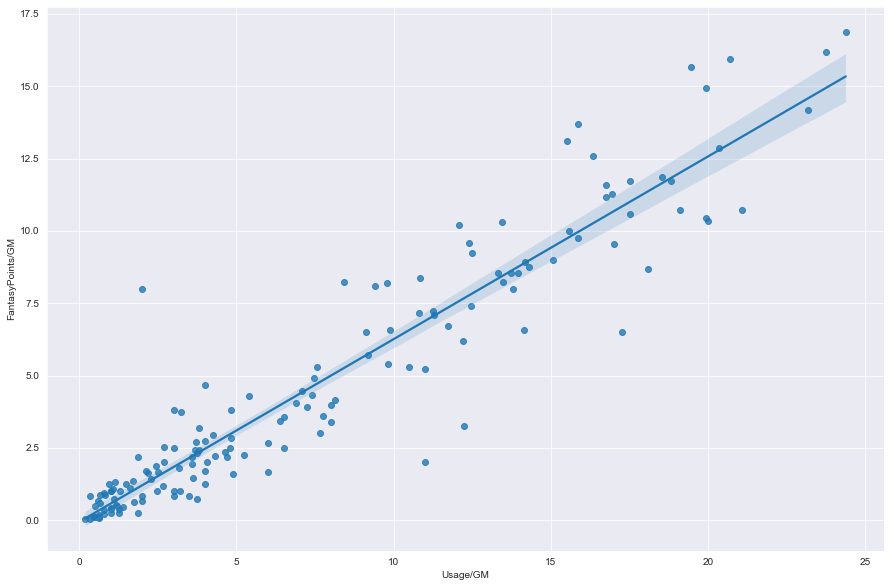

In [78]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plot = sns.regplot(
x=rb['Usage/GM'],
y=rb['FantasyPoints/GM'],
scatter=True,)

In [79]:
wr['FantasyPoints/GM'] = wr['FantPt']/wr['G']
wr['FantasyPoints/GM'] = wr['FantasyPoints/GM'].apply(lambda x: round(x, 2))

wr['Usage/GM'] = (wr['RushAtt'] + wr['Tgt'])/wr['G']
wr['Usage/GM'] = wr['Usage/GM'].apply(lambda x: round(x, 2))

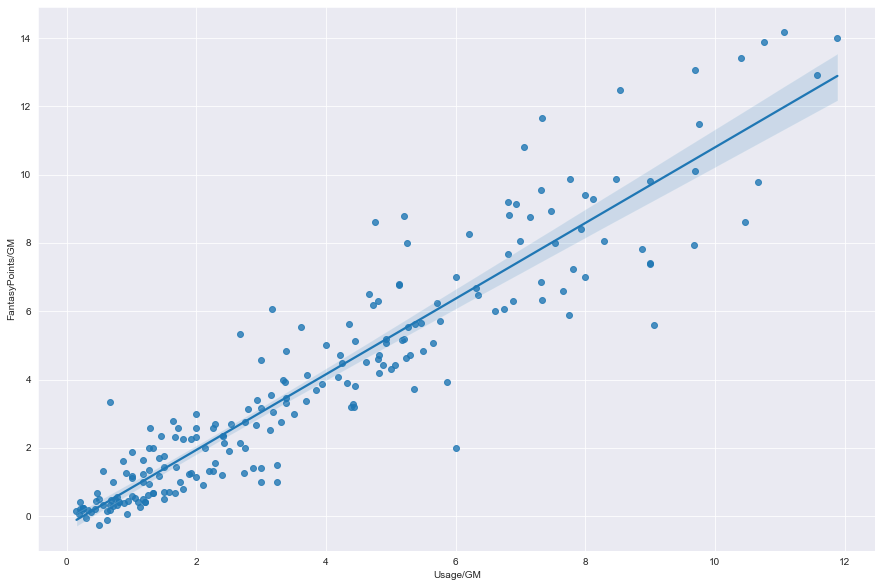

In [80]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plot = sns.regplot(
x=wr['Usage/GM'],
y=wr['FantasyPoints/GM'],
scatter=True,)

In [81]:
te['FantasyPoints/GM'] = te['FantPt']/te['G']
te['FantasyPoints/GM'] = te['FantasyPoints/GM'].apply(lambda x: round(x, 2))

te['Usage/GM'] = (te['RushAtt'] + te['Tgt'])/te['G']
te['Usage/GM'] = te['Usage/GM'].apply(lambda x: round(x, 2))

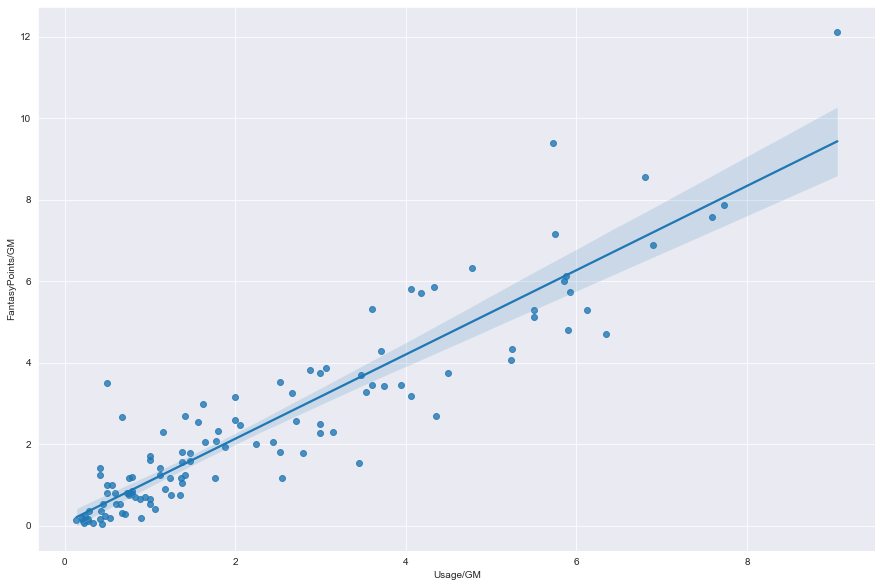

In [82]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plot = sns.regplot(
x=te['Usage/GM'],
y=te['FantasyPoints/GM'],
scatter=True,)

In [83]:
print(qb)

                Player   G  GS  FantPt  Cmp  PassAtt  PassingYds  PassTD  Int  \
0    Patrick Mahomes*+  17  17   416.0  435      648        5250      41   12   
6          Josh Allen*  16  16   396.0  359      567        4283      35   14   
11        Jalen Hurts*  15  15   378.0  306      460        3701      22    6   
16         Joe Burrow*  16  16   351.0  414      606        4475      35   12   
41         Geno Smith*  17  17   304.0  399      572        4282      30   11   
..                 ...  ..  ..     ...  ...      ...         ...     ...  ...   
599        Case Keenum   2   0     NaN    2        7           8       0    0   
624       Nate Sudfeld   2   0     NaN    0        0           0       0    0   
641      C.J. Beathard   4   0    -1.0    7       11          35       0    1   
643         Chad Henne   3   0    -1.0    0        2           0       0    0   
648          Tim Boyle   1   0    -3.0    2        8          33       0    2   

     RushAtt  RushYds   Y/A

In [84]:
import nfl_data_py as nfl

In [85]:
pd.set_option('display.max_columns', None)
year = 2022
data = nfl.import_ngs_data(stat_type='rushing')

print(data)

      season season_type  week  player_display_name player_position team_abbr  \
0       2016         REG     0        David Johnson              RB       ARI   
1       2016         REG     0      Latavius Murray              RB        LV   
2       2016         REG     0         Paul Perkins              RB       NYG   
3       2016         REG     0     Jonathan Stewart              RB       CAR   
4       2016         REG     0         LeSean McCoy              RB       BUF   
...      ...         ...   ...                  ...             ...       ...   
4181    2022        POST    21  Christian McCaffrey              RB        SF   
4182    2022        POST    21        Miles Sanders              RB       PHI   
4183    2022        POST    21        Isiah Pacheco              RB        KC   
4184    2022        POST    21     Kenneth Gainwell              RB       PHI   
4185    2022        POST    23        Isiah Pacheco              RB        KC   

      efficiency  percent_a

In [86]:
data = data[data['week'] == 0]
data = data[data['season'] == year]
data = data.reset_index()

In [87]:
print(data)

    index  season season_type  week    player_display_name player_position  \
0    3569    2022         REG     0          Dameon Pierce              RB   
1    3570    2022         REG     0             Nick Chubb              RB   
2    3571    2022         REG     0           Najee Harris              RB   
3    3572    2022         REG     0            Kareem Hunt              RB   
4    3573    2022         REG     0          Damien Harris              RB   
5    3574    2022         REG     0          Miles Sanders              RB   
6    3575    2022         REG     0        Latavius Murray              RB   
7    3576    2022         REG     0          Austin Ekeler              RB   
8    3577    2022         REG     0      Leonard Fournette              RB   
9    3578    2022         REG     0            Dalvin Cook              RB   
10   3579    2022         REG     0  Cordarrelle Patterson              RB   
11   3580    2022         REG     0          Chuba Hubbard      

In [88]:
import requests
from bs4 import BeautifulSoup

In [89]:
url = "https://www.fantasypros.com/nfl/adp/overall.php?year=2022"